# Chapter 5 Exercises


## Exercises

**Exercise 5.1:** In the BRFSS (see Section 5.4), the distribution of heights is roughly normal with parameters µ = 178 cm and σ = 7.7 cm for men, and µ = 163 cm and σ = 7.3 cm for women.

In order to join Blue Man Group, you have to be male between 5’10” and 6’1” (see http://bluemancasting.com). What percentage of the U.S. male population is in this range? Hint: use `scipy.stats.norm.cdf`.

`scipy.stats` contains objects that represent analytic distributions

In [61]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import brfss

import thinkstats2
import thinkplot
import scipy.stats
import hinc

For example <tt>scipy.stats.norm</tt> represents a normal distribution.

In [45]:
mu = 178
sigma = 7.7
dist = scipy.stats.norm(loc=mu, scale=sigma)
type(dist)

scipy.stats._distn_infrastructure.rv_frozen

A "frozen random variable" can compute its mean and standard deviation.

In [46]:
dist.mean(), dist.std()

(178.0, 7.7)

It can also evaluate its CDF.  How many people are more than one standard deviation below the mean?  About 16%

In [47]:
dist.cdf(mu-sigma)

0.1586552539314574

How many people are between 5'10" and 6'1"?

In [48]:
# ~34.21% of men are between 5'10 and 6'1

low = dist.cdf(177.8) #~49% of men are below 5'10
high = dist.cdf(185.4) #~83% of men are below 6'1 // ~17% of men are above 6'1

low, high, high-low


(0.48963902786483265, 0.8317337108107857, 0.3420946829459531)

**Exercise 5.2:** To get a feel for the Pareto distribution, let’s see how different the world would be if the distribution of human height were Pareto. With the parameters xm = 1 m and α = 1.7, we get a distribution with a reasonable minimum, 1 m, and median, 1.5 m.

Plot this distribution. What is the mean human height in Pareto world? What fraction of the population is shorter than the mean? If there are 7 billion people in Pareto world, how many do we expect to be taller than 1 km? How tall do we expect the tallest person to be?

`scipy.stats.pareto` represents a pareto distribution.  In Pareto world, the distribution of human heights has parameters alpha=1.7 and xmin=1 meter.  So the shortest person is 100 cm and the median is 150.

In [49]:
alpha = 1.7
xmin = 1       # meter
dist = scipy.stats.pareto(b=alpha, scale=xmin)
dist.median()

1.5034066538560549

What is the mean height in Pareto world?

In [38]:
# Solution goes here
dist.mean()

2.428571428571429

What fraction of people are shorter than the mean?

In [39]:
# Solution goes here
dist.cdf(dist.mean())

0.778739697565288

Out of 7 billion people, how many do we expect to be taller than 1 km?  You could use <tt>dist.cdf</tt> or <tt>dist.sf</tt>.

In [40]:
# Solution goes here
(1 - dist.cdf(1000)) * 7e9, dist.sf(1000) * 7e9

(55602.976430479954, 55602.97643069972)

How tall do we expect the tallest person to be?

In [42]:
# Solution 1
dist.sf(600000) * 7e9   


1.0525455861201714

In [50]:
# Solution 2
dist.ppf(1 - 1/7e9)

618349.6106759505

# Chapter 6 Exercise

**Exercise 6.1** The distribution of income is famously skewed to the right. In this exercise, we’ll measure how strong that skew is. The Current Population Survey (CPS) is a joint effort of the Bureau of Labor Statistics and the Census Bureau to study income and related variables. Data collected in 2013 is available from http://www.census.gov/hhes/www/cpstables/032013/hhinc/toc.htm. I downloaded hinc06.xls, which is an Excel spreadsheet with information about household income, and converted it to hinc06.csv, a CSV file you will find in the repository for this book. You will also find hinc2.py, which reads this file and transforms the data.

The dataset is in the form of a series of income ranges and the number of respondents who fell in each range. The lowest range includes respondents who reported annual household income “Under  5000.”𝑇ℎ𝑒ℎ𝑖𝑔ℎ𝑒𝑠𝑡𝑟𝑎𝑛𝑔𝑒𝑖𝑛𝑐𝑙𝑢𝑑𝑒𝑠𝑟𝑒𝑠𝑝𝑜𝑛𝑑𝑒𝑛𝑡𝑠𝑤ℎ𝑜𝑚𝑎𝑑𝑒“ 250,000 or more.”

To estimate mean and other statistics from these data, we have to make some assumptions about the lower and upper bounds, and how the values are distributed in each range. hinc2.py provides InterpolateSample, which shows one way to model this data. It takes a DataFrame with a column, income, that contains the upper bound of each range, and freq, which contains the number of respondents in each frame.

It also takes log_upper, which is an assumed upper bound on the highest range, expressed in log10 dollars. The default value, log_upper=6.0 represents the assumption that the largest income among the respondents is  106 , or one million dollars.

InterpolateSample generates a pseudo-sample; that is, a sample of household incomes that yields the same number of respondents in each range as the actual data. It assumes that incomes in each range are equally spaced on a log10 scale.

In [62]:
def InterpolateSample(df, log_upper=6.0):
    """Makes a sample of log10 household income.

    Assumes that log10 income is uniform in each range.

    df: DataFrame with columns income and freq
    log_upper: log10 of the assumed upper bound for the highest range

    returns: NumPy array of log10 household income
    """
    # compute the log10 of the upper bound for each range
    df['log_upper'] = np.log10(df.income)

    # get the lower bounds by shifting the upper bound and filling in
    # the first element
    df['log_lower'] = df.log_upper.shift(1)
    df.loc[0, 'log_lower'] = 3.0

    # plug in a value for the unknown upper bound of the highest range
    df.loc[41, 'log_upper'] = log_upper
    
    # use the freq column to generate the right number of values in
    # each range
    arrays = []
    for _, row in df.iterrows():
        vals = np.linspace(row.log_lower, row.log_upper, row.freq)
        arrays.append(vals)

    # collect the arrays into a single sample
    log_sample = np.concatenate(arrays)
    return log_sample


In [63]:
income_df = hinc.ReadData()

In [64]:
log_sample = InterpolateSample(income_df, log_upper=6.0)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:26: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


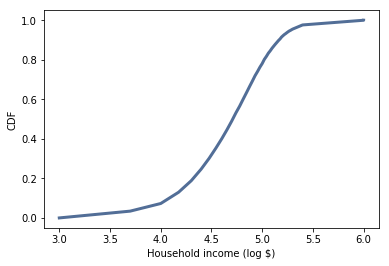

In [65]:
log_cdf = thinkstats2.Cdf(log_sample)
thinkplot.Cdf(log_cdf)
thinkplot.Config(xlabel='Household income (log $)',
               ylabel='CDF')

In [66]:
sample = np.power(10, log_sample)

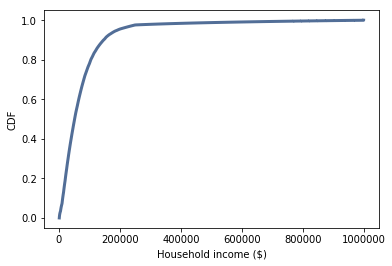

In [67]:
cdf = thinkstats2.Cdf(sample)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Household income ($)',
               ylabel='CDF')

Compute the median, mean, skewness and Pearson’s skewness of the resulting sample. What fraction of households report a taxable income below the mean? How do the results depend on the assumed upper bound?

In [81]:
# Solution
def RawMoment(xs, k):
    return sum(x**k for x in xs) / len(xs)
def StandardizedMoment(xs, k):
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    return CentralMoment(xs, k) / std**k
def Mean(xs):
    return RawMoment(xs, 1)
def CentralMoment(xs, k):
    mean = RawMoment(xs, 1)
    return sum((x - mean)**k for x in xs) / len(xs)
def Skewness(xs):
    return StandardizedMoment(xs, 3)
def Median(xs):
    cdf = thinkstats2.Cdf(xs)
    return cdf.Value(0.5)
def PearsonMedianSkewness(xs):
    median = Median(xs)
    mean = RawMoment(xs, 1)
    var = CentralMoment(xs, 2)
    std = np.sqrt(var)
    gp = 3 * (mean - median) / std
    return gp

In [82]:
Mean(sample), Median(sample)

(74278.70753118733, 51226.45447894046)

In [83]:
# Solution

Skewness(sample), PearsonMedianSkewness(sample)

(4.949920244429583, 0.7361258019141782)

In [84]:
# Solution

# About 66% of the population makes less than the mean

cdf.Prob(Mean(sample))

0.660005879566872